# Create Baseline Model

Goal: Create a simple neural network based regression model that outputs a steering angle prediction prediction.

#### Resources:

[Keras regression model tutorial](http://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/)

#### Import Sci-kit Learn, pandas and Keras

In [14]:
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
from random import randint


#### Load data using pandas dataframe

In [15]:
 data = pd.read_csv("driving_log.csv")

#### Example of a frame

Cell shows filenames for center, left and center images as well as steering, throttle, brake and speed.

In [16]:
print (data.ix[343])

center      IMG/center_2016_12_01_13_33_13_011.jpg
left          IMG/left_2016_12_01_13_33_13_011.jpg
right        IMG/right_2016_12_01_13_33_13_011.jpg
steering                                  0.195719
throttle                                  0.985533
brake                                            0
speed                                      30.1779
Name: 343, dtype: object


### Load Images

In [17]:
import cv2

sample_path = data.ix[0][0]

#### Normalize Image

In [18]:
def normalize_image(image):
    image = image / 255
    image -= 0.5
    return image

#### Resize Image

In [19]:
def resize_image(image, plot = False):
    crop_image = image[50:150, :]
    image = cv2.resize(crop_image, (200, 66), interpolation=cv2.INTER_AREA)
    return image

#### Get images from path

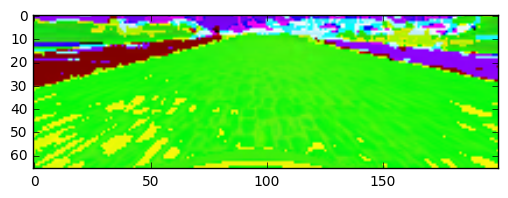

(66, 200, 3)

In [20]:
def get_image(path, plot = False):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    image = normalize_image(image)
    image = resize_image(image)
    if plot == True:
        plt.imshow(image)
        plt.show()
    return image

image = get_image(sample_path, plot=True)
image.shape

#### Generate Data

For baseline model, use only center images and use all y values

In [21]:
batch_size = 35
steering_batch = np.zeros(batch_size)
image_batch = np.zeros((batch_size, 66, 200, 3))

In [22]:
# shuffle dataframe
data = data.sample(frac=1)

# create a batch frame
# feed each row in batch_frame to get images
# store values in steering_batch and image_batch

def preprocess(i, data):
    index = randint(0, len(data) - 1)
    path = data.ix[index][0]
    x = get_image(path)
    y = data.ix[index][3]
    return x, y

def create_batch(data, batch_size):
    while True:
        for i in range(batch_size):
            x, y = preprocess(i, data)
            image_batch[i] = x
            steering_batch[i] = y
        yield image_batch, steering_batch    

#### Nvidia Model

In [23]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Input, Activation, Conv2D, Flatten, MaxPooling2D, Activation, Dropout
from keras.optimizers import Adam

In [24]:
model = Sequential()

model.add(Conv2D(24, 5, 5, input_shape=(66, 200, 3)))
model.add(MaxPooling2D((2,2)))
model.add((Dropout(0.5)))
model.add(Activation('relu'))

model.add(Conv2D(36, 5, 5))
model.add(MaxPooling2D((2,2)))
model.add((Dropout(0.5)))
model.add(Activation('relu'))

model.add(Conv2D(48, 5, 5))
model.add(MaxPooling2D((2,2), border_mode='same'))
model.add((Dropout(0.5)))
model.add(Activation('relu'))

model.add(Conv2D(64, 3, 3))
model.add((Dropout(0.5)))
model.add(Activation('relu'))

model.add(Conv2D(64, 3, 3))
model.add((Dropout(0.5)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(1164, activation='relu'))
model.add((Dropout(0.5)))

model.add(Dense(100, activation='relu'))

model.add(Dense(50, activation='relu'))

model.add(Dense(10, activation='relu'))

model.add(Dense(1))


In [25]:
nb_val = len(data)

gen = create_batch(data, batch_size)
val = create_batch(data, batch_size)

In [26]:
model.compile(loss='mse', optimizer=Adam(lr=0.0001),metrics=['accuracy'])
history = model.fit_generator(create_batch(data, batch_size), samples_per_epoch=20224, 
                              nb_epoch=9,validation_data=val, nb_val_samples=nb_val, verbose=2)

Epoch 1/9


/home/kishb87/anaconda3/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/keras/engine/training.py:1527: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


67s - loss: 0.0123 - acc: 0.5387 - val_loss: 0.0116 - val_acc: 0.5552
Epoch 2/9
67s - loss: 0.0102 - acc: 0.5432 - val_loss: 0.0108 - val_acc: 0.5379
Epoch 3/9
66s - loss: 0.0099 - acc: 0.5455 - val_loss: 0.0097 - val_acc: 0.5359
Epoch 4/9
65s - loss: 0.0097 - acc: 0.5442 - val_loss: 0.0096 - val_acc: 0.5369
Epoch 5/9
65s - loss: 0.0097 - acc: 0.5473 - val_loss: 0.0093 - val_acc: 0.5420
Epoch 6/9
65s - loss: 0.0093 - acc: 0.5420 - val_loss: 0.0092 - val_acc: 0.5439
Epoch 7/9
67s - loss: 0.0094 - acc: 0.5397 - val_loss: 0.0089 - val_acc: 0.5461
Epoch 8/9
65s - loss: 0.0092 - acc: 0.5415 - val_loss: 0.0092 - val_acc: 0.5422
Epoch 9/9
66s - loss: 0.0090 - acc: 0.5401 - val_loss: 0.0095 - val_acc: 0.5364
